In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [5]:
df = pd.read_csv('diabetes.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Vemos si hay valores que son 0 
print((df['Glucose'] == 0).sum())
print((df['BloodPressure'] == 0).sum())
print((df['SkinThickness'] == 0).sum())
print((df['Insulin'] == 0).sum())
print((df['BMI'] == 0).sum())
print((df['DiabetesPedigreeFunction'] == 0).sum())
print((df['Age'] == 0).sum())

5
35
227
374
11
0
0


<Axes: xlabel='BMI', ylabel='Count'>

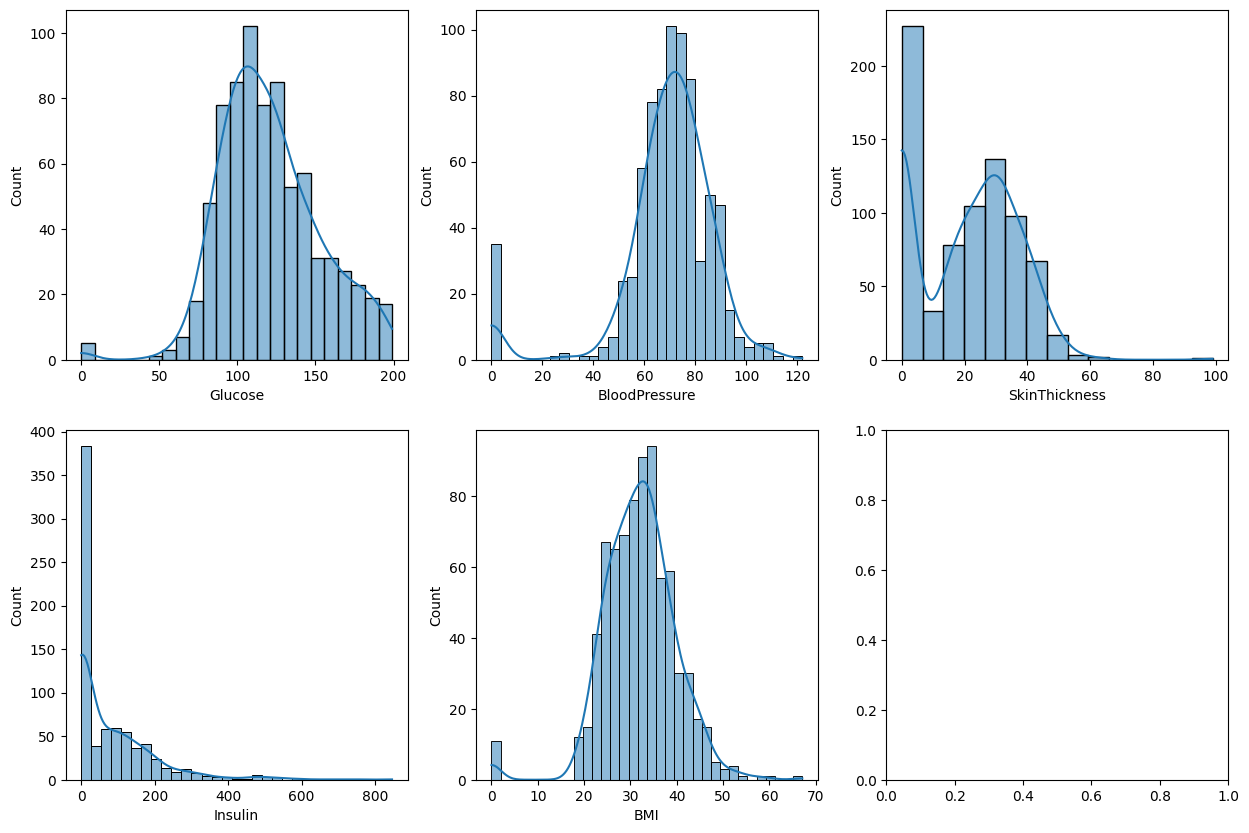

In [5]:
#checking for the data distribution type to identity impute method for missing values.
fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.histplot(df.Glucose, ax= axes[0,0], kde=True)
sns.histplot(df.BloodPressure,  ax= axes[0,1],kde=True)
sns.histplot(df.SkinThickness,  ax= axes[0,2], kde=True)
sns.histplot(df.Insulin,  ax= axes[1,0], kde=True)
sns.histplot(df.BMI,  ax= axes[1,1], kde=True)


In [6]:

df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True) # Distribucion normal
# Reemplazar los valores de 'BloodPressure' menores que 50 con la media
blood_pressure_mean = df['BloodPressure'].mean() # Distribucion normal
df.loc[df['BloodPressure'] < 50, 'BloodPressure'] = blood_pressure_mean
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True) # Distribucion asimetrica
df['BMI'].replace(0, df['BMI'].median(), inplace=True) # Distribucion asimetrica
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True) # Distribucion asimetrica

C:\Users\serra\AppData\Local\Temp\ipykernel_42604\3764854260.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\serra\AppData\Local\Temp\ipykernel_42604\3764854260.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\serra\AppData\Local\Temp\ipykernel_42604\3764854260.py:5: FutureWarning:

A value is trying to be set on a copy 

<Axes: >

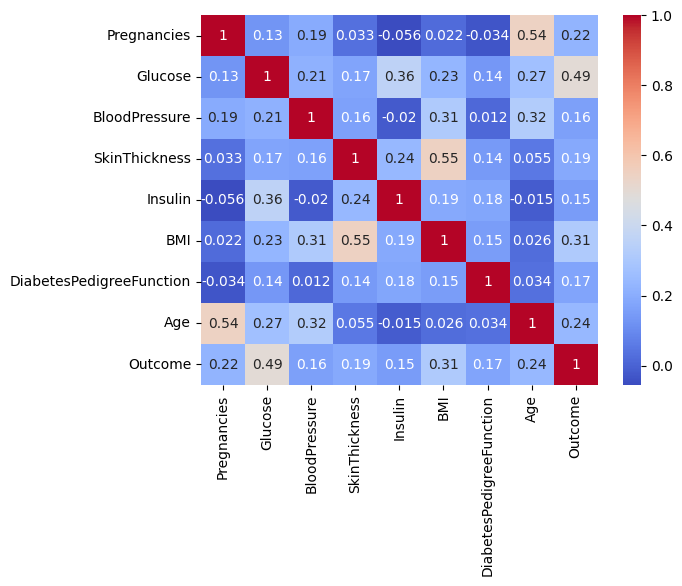

In [7]:
sns.heatmap(df.corr(),annot =True, cmap='coolwarm')

In [8]:

df['Outcome'] = df['Outcome'].astype('category',copy=False)

# Convertimos  0/1 a valores  'Si'/'No'
def convert_outcome(x):
    if x == 1:
        return 'Si'
    else:
        return 'No'

df['Outcome'] = df['Outcome'].apply(convert_outcome)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 49.0 KB


In [9]:
df.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.822108,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.436016,11.238625,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,50.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,65.750000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Axes: >

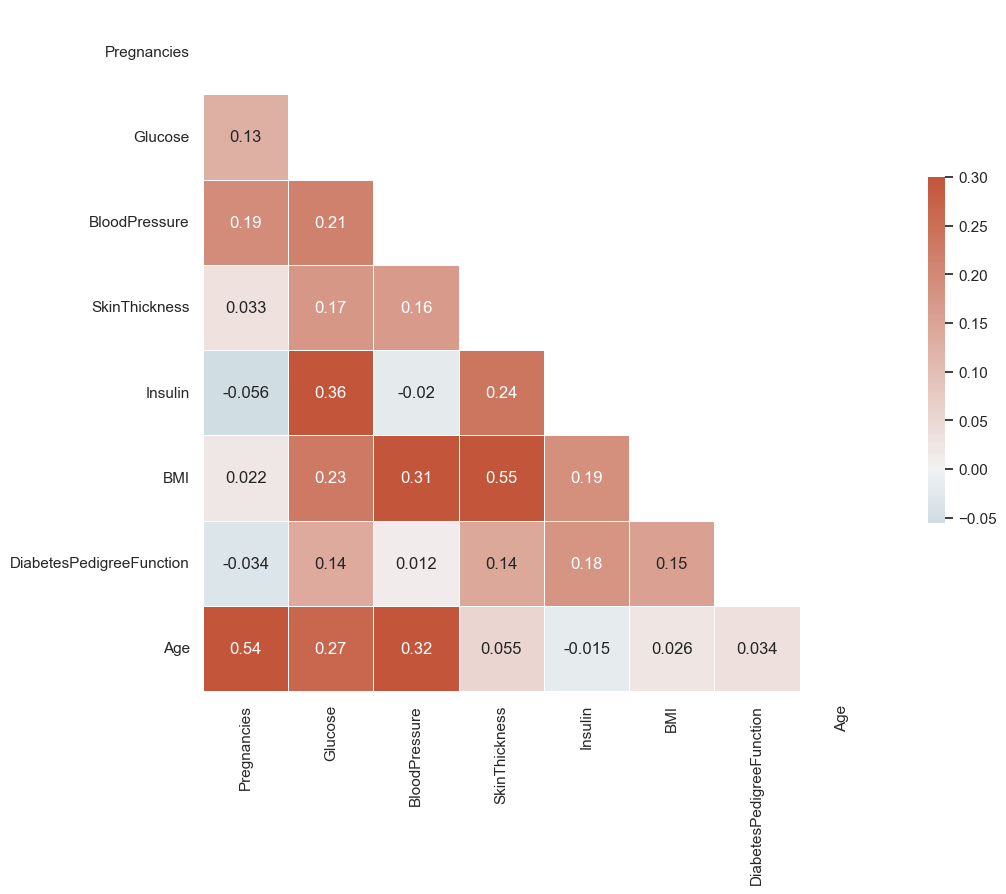

In [10]:
sns.set_theme(style="white")

# make a dataframe with only numberic variables, without 'Outcome'
d = df.drop(['Outcome'], axis=1)

# Compute the correlation matrix for numeric features
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
dfg = df['Outcome'].value_counts().reset_index()
dfg.columns = ['Outcome', 'Quantity']
fig = px.bar(dfg, x='Outcome', y='Quantity', title='Quantity of Patients by Outcome' ) 
fig.show()

In [12]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Outcome vs. Pregnancies</b>',
                                                    '<b>Outcome vs. Glucose</b>',
                                                    '<b>Outcome vs. Blood Pressure</b>',
                                                    '<b>Outcome vs. Skin Thickness</b>',
                                                    '<b>Outcome vs. Insulin</b>',
                                                    '<b>Outcome vs. BMI</b>',
                                                    '<b>Outcome vs. Diabetes Pedigree Func.</b>',
                                                    '<b>Outcome vs. Age</b>'
                                                   ))

fig.add_trace(go.Box(y=df['Pregnancies'], x=df['Outcome']), row=1, col=1)
fig.add_trace(go.Box(y=df['Glucose'], x=df['Outcome']), row=1, col=2)
fig.add_trace(go.Box(y=df['BloodPressure'], x=df['Outcome']), row=1, col=3)
fig.add_trace(go.Box(y=df['SkinThickness'], x=df['Outcome']), row=1, col=4)
fig.add_trace(go.Box(y=df['Insulin'], x=df['Outcome']), row=2, col=1)
fig.add_trace(go.Box(y=df['BMI'], x=df['Outcome']), row=2, col=2)
fig.add_trace(go.Box(y=df['DiabetesPedigreeFunction'], x=df['Outcome']), row=2, col=3)
fig.add_trace(go.Box(y=df['Age'], x=df['Outcome']), row=2, col=4)

                                
# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

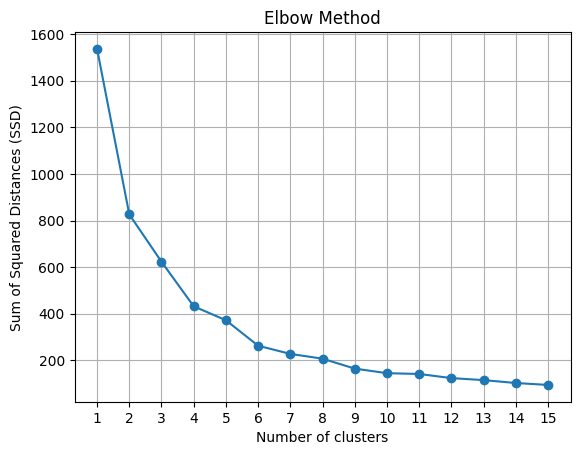

Promedio del Coeficiente de Silueta: 0.4144955726213939


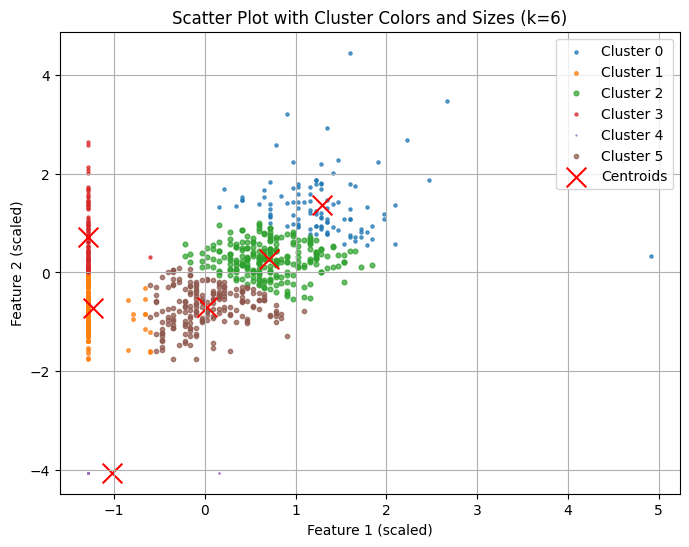

In [41]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumiendo que df es tu DataFrame y todas las columnas excepto la última son características
X = df[['SkinThickness','BMI']]  # Ajusta esto si tu estructura de datos es diferente
#SON LOS QUE MAYOR RELACIÓN TIENEN EN LA MATRIZ DE CORRELACIÓN
#TB podemos probar con los que tienen mayor relación con el outcome
#hay que decidir y justificar que variables cogemos, intentar ajustar la distancia (esta es la euclidia) hay q hacer la mahalanobis

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
def elbow_method(X, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        ssd_values.append(kmeans.inertia_)
    return ssd_values

# Ejecutar método del codo
max_k = 15
ssd_values = elbow_method(X_scaled, max_k)

# Graficar el método del codo
plt.plot(range(1, max_k + 1), ssd_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


# Elegir un valor de k específico
k_chosen = 6
kmeans = KMeans(n_clusters=k_chosen, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

# Calcular el tamaño de cada cluster
cluster_sizes = np.bincount(clusters)

# Visualización de los clusters
#plt.figure(figsize=(8, 6))
#plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
#plt.title(f'Visualization of Clusters formed by K-Means (k={k_chosen})')
#plt.xlabel('Feature 1 (scaled)')
#plt.ylabel('Feature 2 (scaled)')
#plt.legend()
#plt.grid(True)
#plt.show()

# Calcular coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)
# Graficar el diagrama de dispersión con colores de cluster y tamaño de cluster
plt.figure(figsize=(8, 6))
for cluster_label in range(k_chosen):
    cluster_points = X_scaled[clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7, s=cluster_sizes[cluster_label]*0.05)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title(f'Scatter Plot with Cluster Colors and Sizes (k={k_chosen})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()


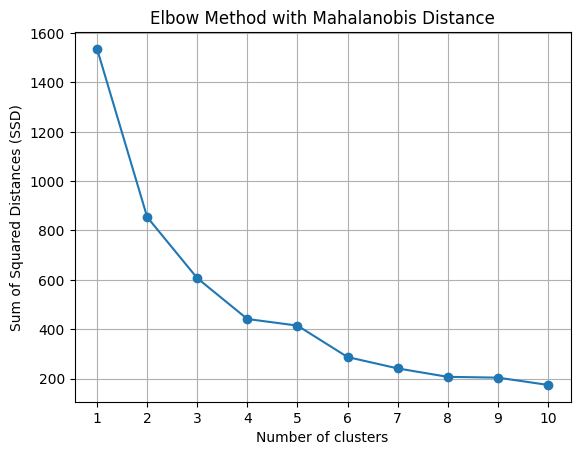

Promedio del Coeficiente de Silueta: 0.3989324349687145


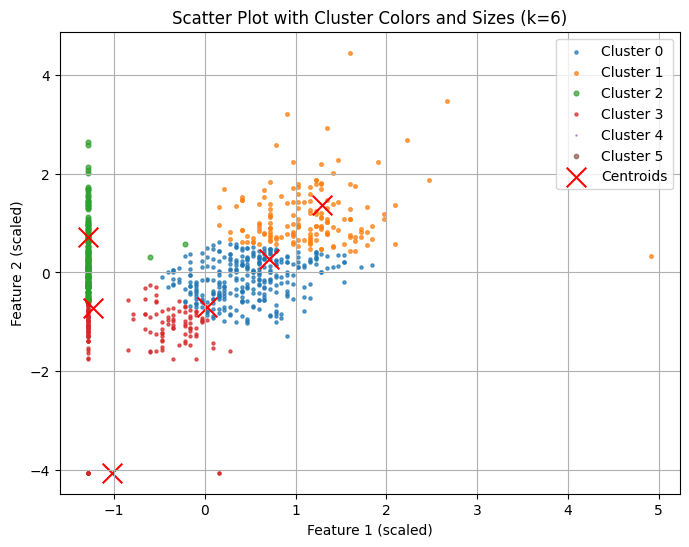

In [46]:
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

X = df[['SkinThickness','BMI']] 
class KMeansMahalanobis:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

    def _mahalanobis_dist(self, x, y, VI):
        return distance.mahalanobis(x, y, VI)

    def fit(self, X):
        X = np.asarray(X)
        self._initialize_centroids(X)
        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            clusters = []
            for x in X:
                distances = [self._mahalanobis_dist(x, centroid, np.linalg.inv(np.cov(X, rowvar=False))) for centroid in self.centroids]
                cluster = np.argmin(distances)
                clusters.append(cluster)
            clusters = np.array(clusters)
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.allclose(old_centroids, new_centroids, atol=self.tol):
                break
            self.centroids = new_centroids
        return clusters


# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Método del codo
def elbow_method(X, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        kmeans_mahalanobis = KMeansMahalanobis(n_clusters=k)
        clusters = kmeans_mahalanobis.fit(X)
        ssd = 0
        for i, centroid in enumerate(kmeans_mahalanobis.centroids):
            ssd += np.sum((X[clusters == i] - centroid) ** 2)
        ssd_values.append(ssd)
    return ssd_values

# Ejecutar método del codo
max_k = 10
#ssd_values = elbow_method(X_scaled, max_k)

# Graficar el método del codo
plt.plot(range(1, max_k + 1), ssd_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method with Mahalanobis Distance')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

# Ejemplo de uso
kmeans_mahalanobis = KMeansMahalanobis(n_clusters=4, random_state=42)
clusters = kmeans_mahalanobis.fit(X_scaled)



# Visualizar los clusters
# Calcular coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)
# Graficar el diagrama de dispersión con colores de cluster y tamaño de cluster
plt.figure(figsize=(8, 6))
for cluster_label in range(k_chosen):
    cluster_points = X_scaled[clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7, s=cluster_sizes[cluster_label]*0.05)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title(f'Scatter Plot with Cluster Colors and Sizes (k={k_chosen})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()



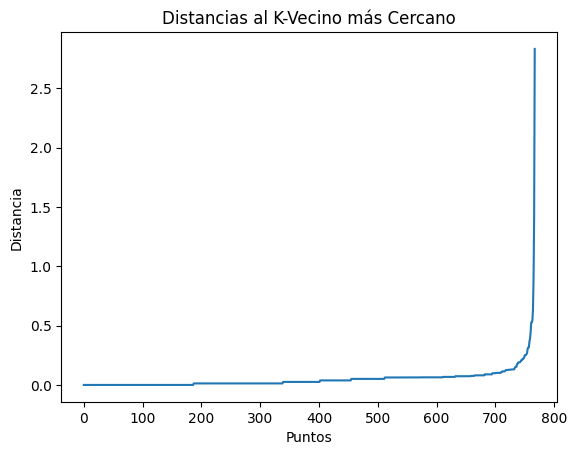

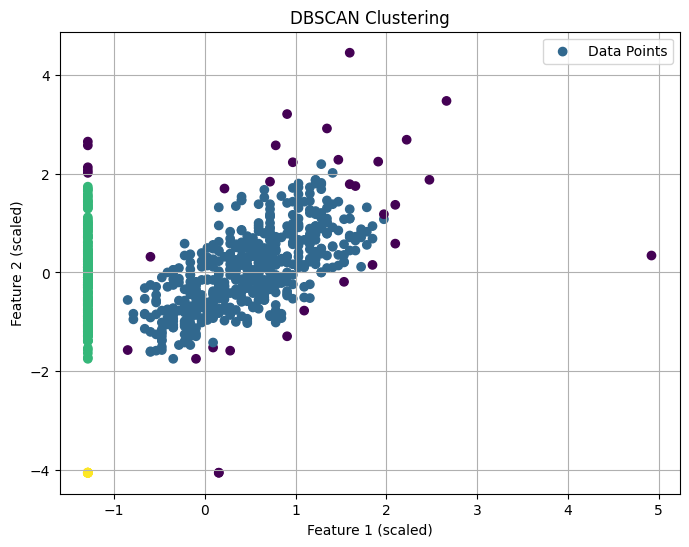

Promedio del Coeficiente de Silueta: 0.3978748828064255


In [62]:
# build the clustering model
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#LOS PARAMETROS A CAMBIAR SON EL NUMERO DE VECINOS, EN FUNCION DE LA GRAFICA EL distances[AQUI] y EL NUMERO DE ELEMENTOS X CLSUTER

# Asumiendo que df es tu DataFrame y todas las columnas excepto la última son características
X  = df[['SkinThickness','BMI']]  # Ajusta esto si tu estructura de datos es diferente

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el valor de eps utilizando el método del k-vecino más cercano
neighbors = NearestNeighbors(n_neighbors=5) #elijo el numero de vecino mas cercano (NO SE QUE CRITERIO HAY Q USAR PARA ELEGIR EL VECINO)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.title('Distancias al K-Vecino más Cercano')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.show()

# Definir y ajustar el modelo DBSCAN
eps= distances[750]  # radio de la vecindad
min_samples = 5  # número mínimo de muestras en una vecindad para formar un cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)


In [ ]:
# build the clustering model
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# clustering dataset - we  will reuse d (the dataset of numeric features)
X = StandardScaler().fit_transform(d)

In [ ]:
# determine the best value for eps , using the approach in 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
fig = px.scatter(
    distances, 
    title='Distance Curve')
fig.update_xaxes(title_text='Distances')
fig.update_yaxes(title_text='Distance threashold (espsilon)')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=2.1649, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 46
Silhouette Coefficient: 0.358


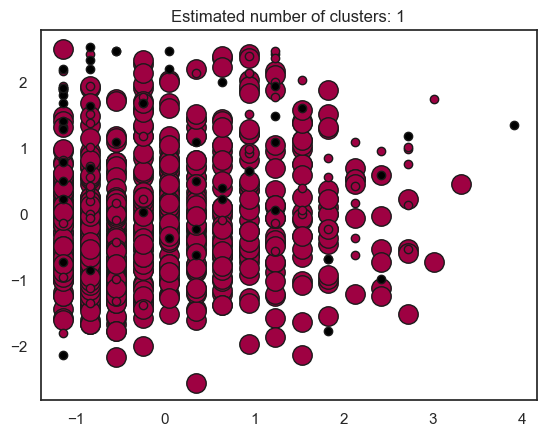

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:

fig = px.scatter(df, color='Outcome', x='BMI', y='Insulin', title='Relations of BMI and Insulin level')
fig.show()

For n_clusters = 6 The average silhouette_score is : 0.15101163416843918
For n_clusters = 7 The average silhouette_score is : 0.14406399905287584
For n_clusters = 8 The average silhouette_score is : 0.15090633540208762
For n_clusters = 9 The average silhouette_score is : 0.1336920440490866
For n_clusters = 10 The average silhouette_score is : 0.14529027993068885
For n_clusters = 11 The average silhouette_score is : 0.1142314363752186
For n_clusters = 12 The average silhouette_score is : 0.12050021524680597


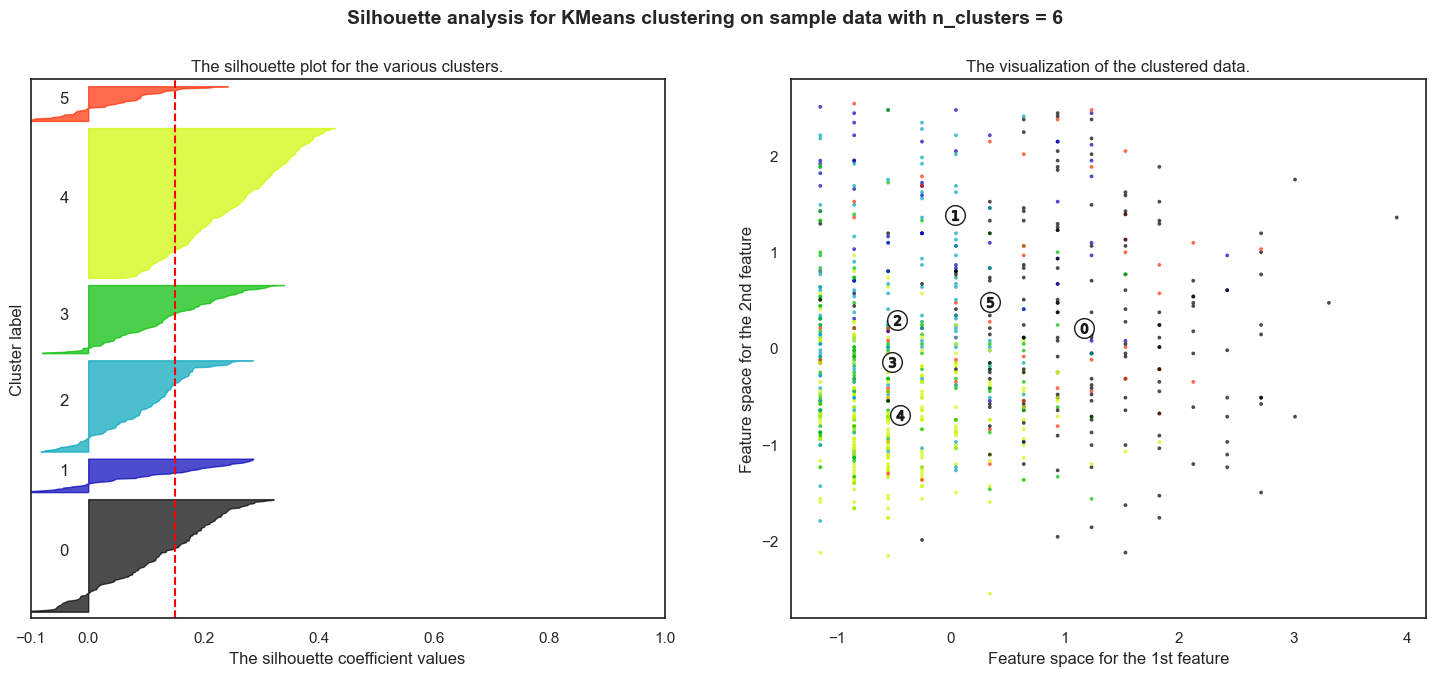

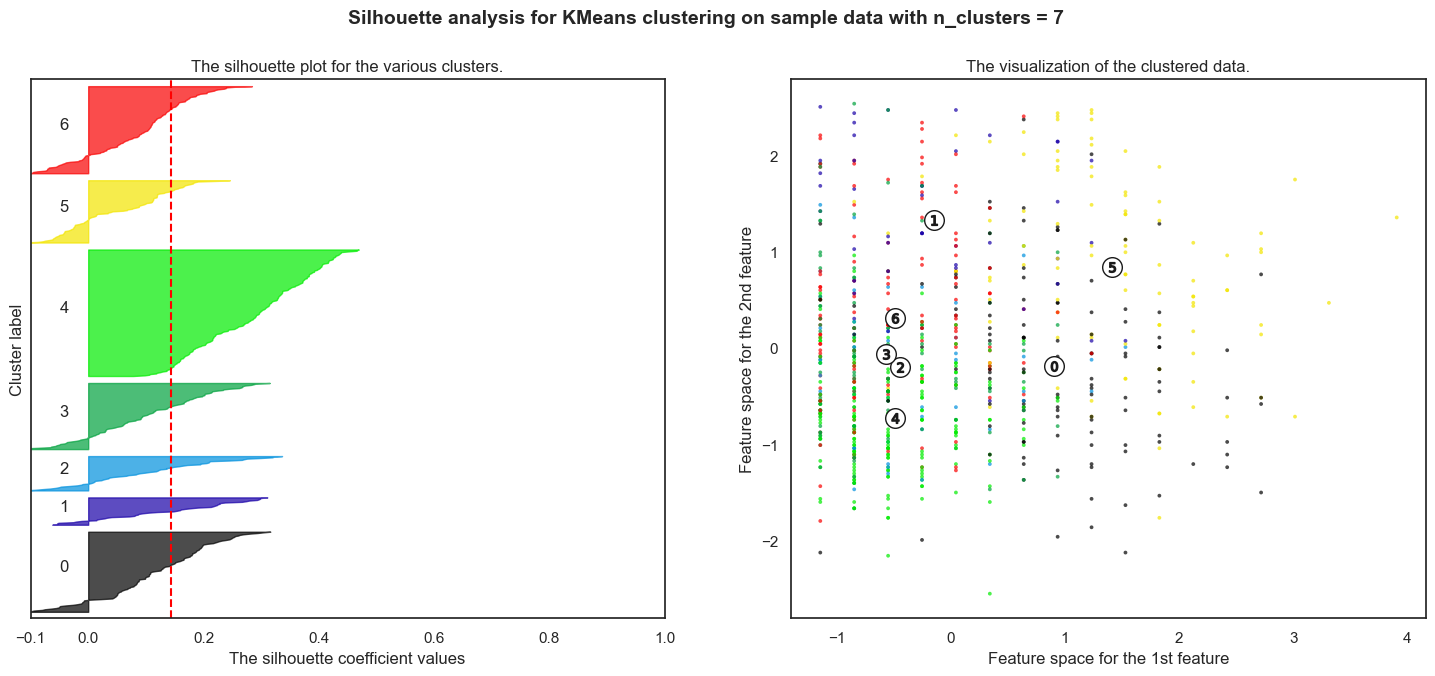

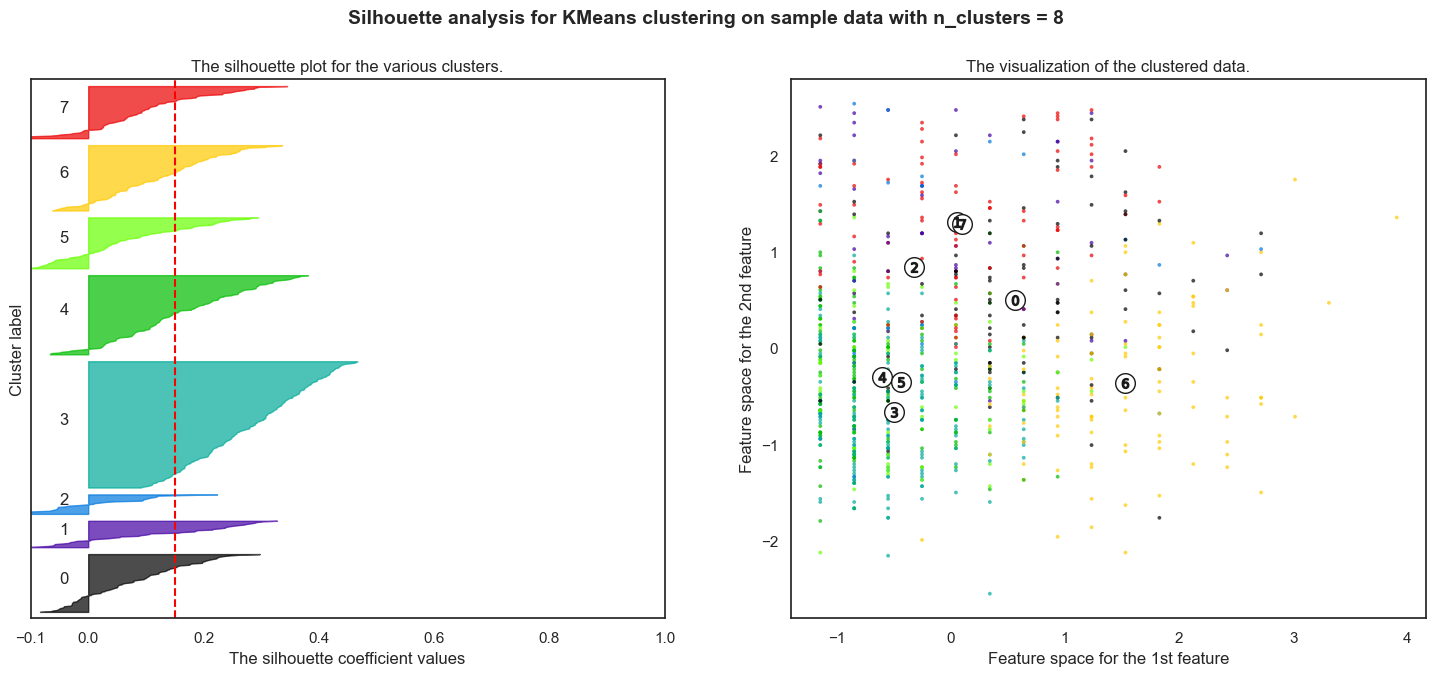

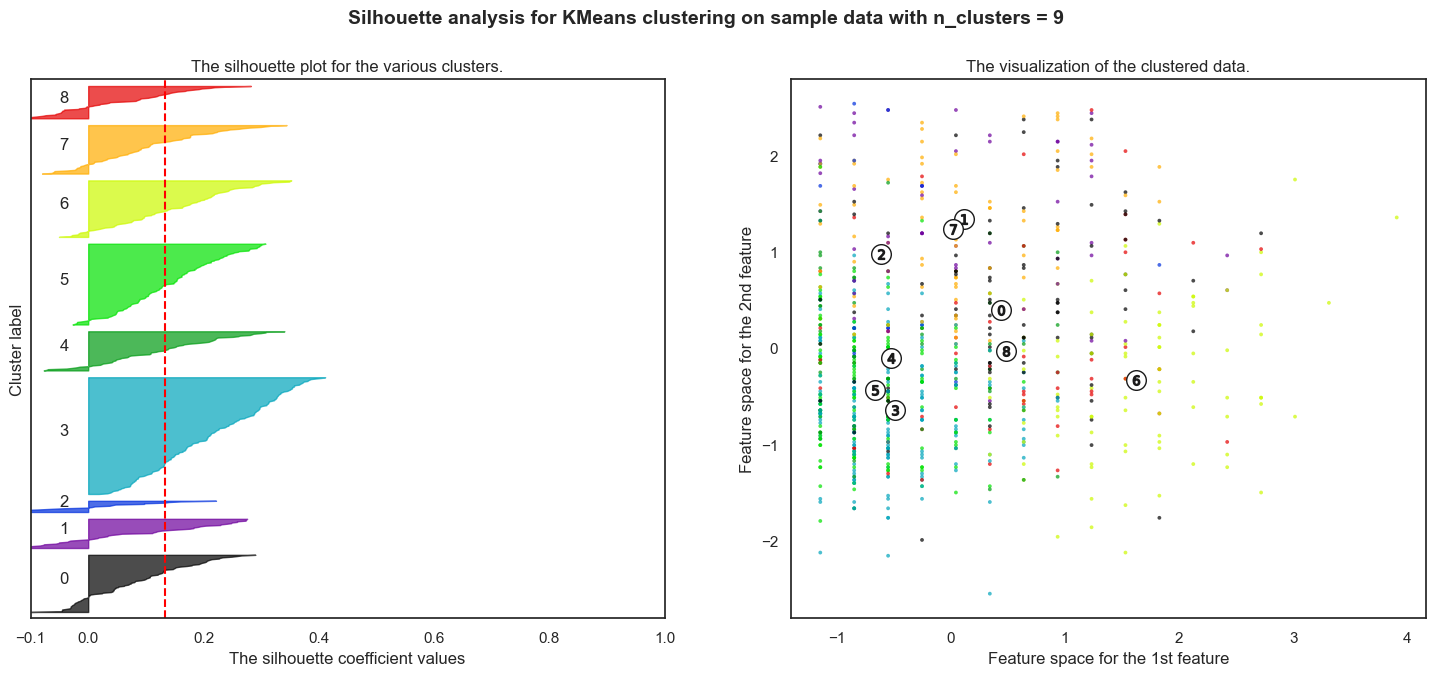

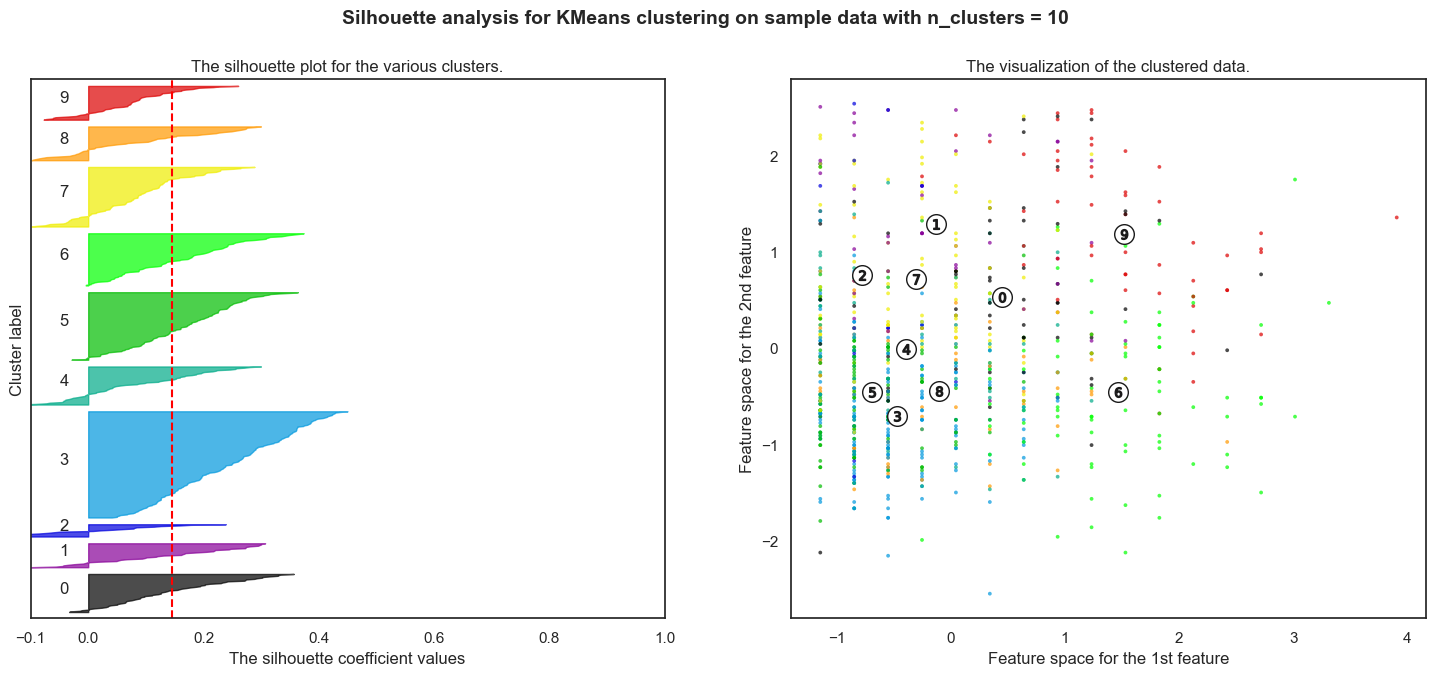

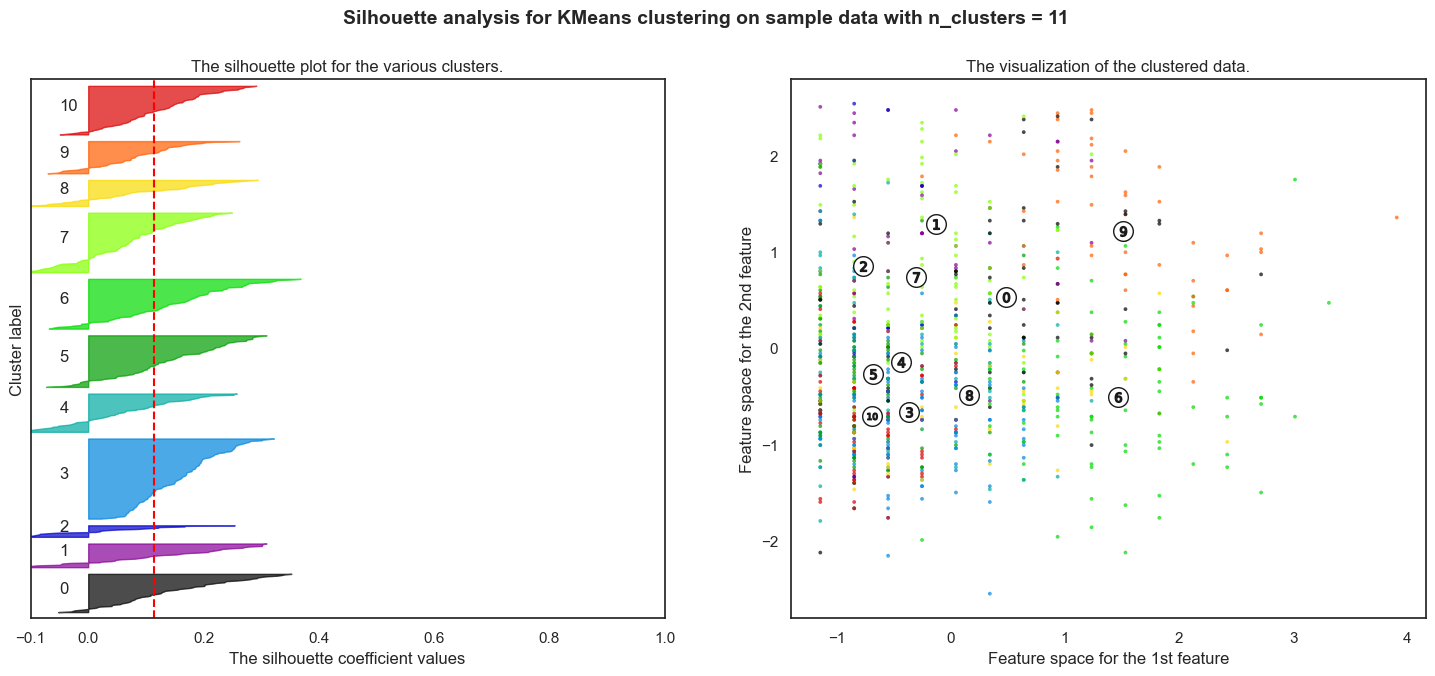

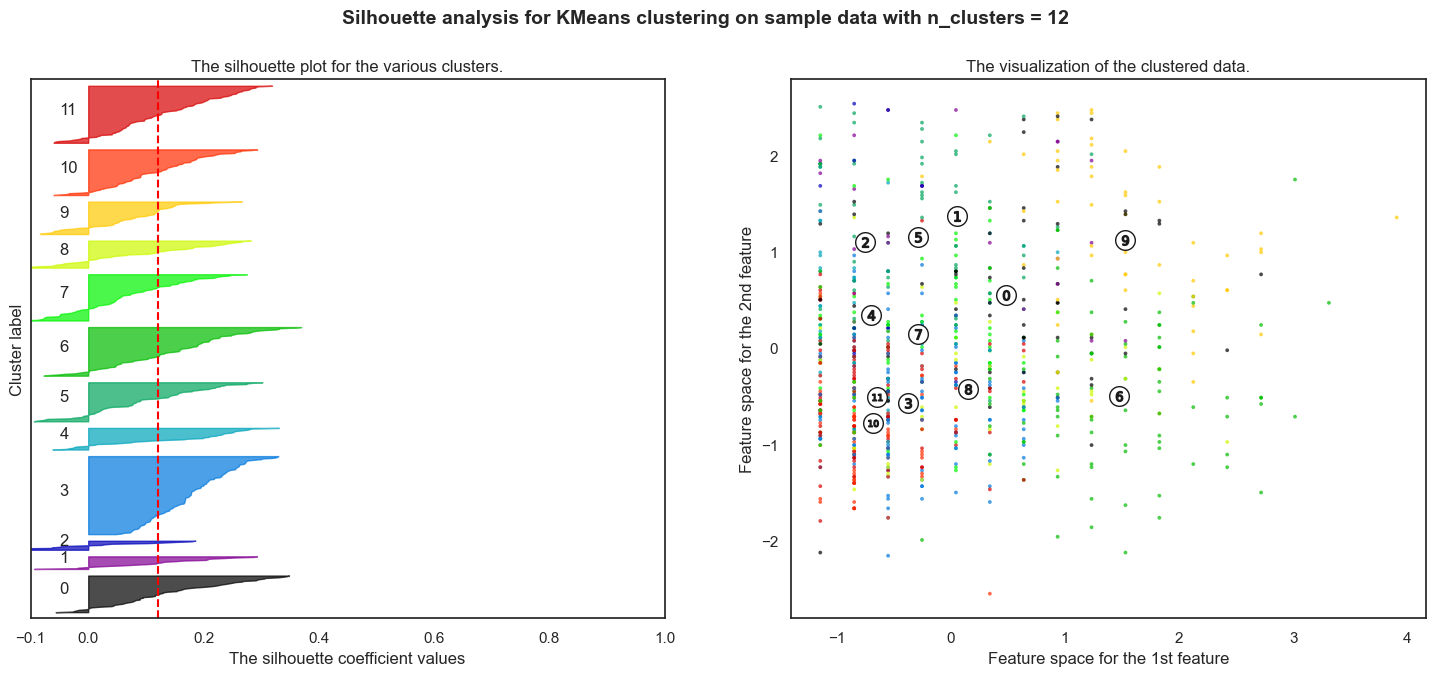

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = StandardScaler().fit_transform(X)
d
range_n_clusters = [6, 7, 8, 9, 10, 11, 12]

y_lower_start = 10
y_lower_step = 10

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = y_lower_start
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + y_lower_step  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans

best_clusters_number = 9

kmeans = KMeans(n_clusters=best_clusters_number)
kmeans.fit(X)

clusters = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# assign calculated clusters as a new feature variable to the observations
df['cluster'] = clusters
d['cluster'] = clusters


d.groupby('cluster').mean().reset_index()

,cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.350000,163.450000,72.350000,33.400000,426.525000,36.102500,0.625525,33.000000
1,1,2.135135,98.328590,64.384945,20.859459,57.816216,26.858378,0.367400,24.686486
2,2,6.554054,158.027027,84.675676,24.986486,73.020270,33.060811,0.500743,52.459459
3,3,1.589744,117.858974,75.878556,42.628205,124.474359,40.760256,0.472910,27.564103
4,4,2.088235,112.861711,81.856043,25.833333,60.401961,34.963725,0.353647,29.019608
5,5,10.039216,124.154795,78.945312,36.568627,102.450980,38.149020,0.511176,43.137255
6,6,2.645161,147.235425,66.956443,25.591398,106.193548,31.581720,0.415613,29.096774
7,7,2.488889,119.644444,69.429253,28.955556,86.711111,34.146667,1.236178,30.888889
8,8,7.320000,109.150000,72.108437,24.410000,46.595000,28.980000,0.390470,43.540000


In [ ]:
fig = make_subplots(rows=8, cols=1, subplot_titles=('<b>Pregnancies in clusters</b>',
                                                    '<b>Glucose in clusters</b>',
                                                    '<b>Blood Pressure in clusters</b>',
                                                    '<b>Skin Thickness in clusters</b>',
                                                    '<b>Insulin in clusters</b>',
                                                    '<b>BMI in clusters</b>',
                                                    '<b>Diabetes Pedigree Func. in clusters</b>',
                                                    '<b>Age in clusters</b>'
                                                   ))

fig.add_trace(go.Box(y=df['Pregnancies'], x=df['cluster']), row=1, col=1)
fig.add_trace(go.Box(y=df['Glucose'], x=df['cluster']), row=2, col=1)
fig.add_trace(go.Box(y=df['BloodPressure'], x=df['cluster']), row=3, col=1)
fig.add_trace(go.Box(y=df['SkinThickness'], x=df['cluster']), row=4, col=1)
fig.add_trace(go.Box(y=df['Insulin'], x=df['cluster']), row=5, col=1)
fig.add_trace(go.Box(y=df['BMI'], x=df['cluster']), row=6, col=1)
fig.add_trace(go.Box(y=df['DiabetesPedigreeFunction'], x=df['cluster']), row=7, col=1)
fig.add_trace(go.Box(y=df['Age'], x=df['cluster']), row=8, col=1)

                                
# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=900,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

C:\Users\serra\AppData\Local\Temp\ipykernel_25996\2053942660.py:66: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



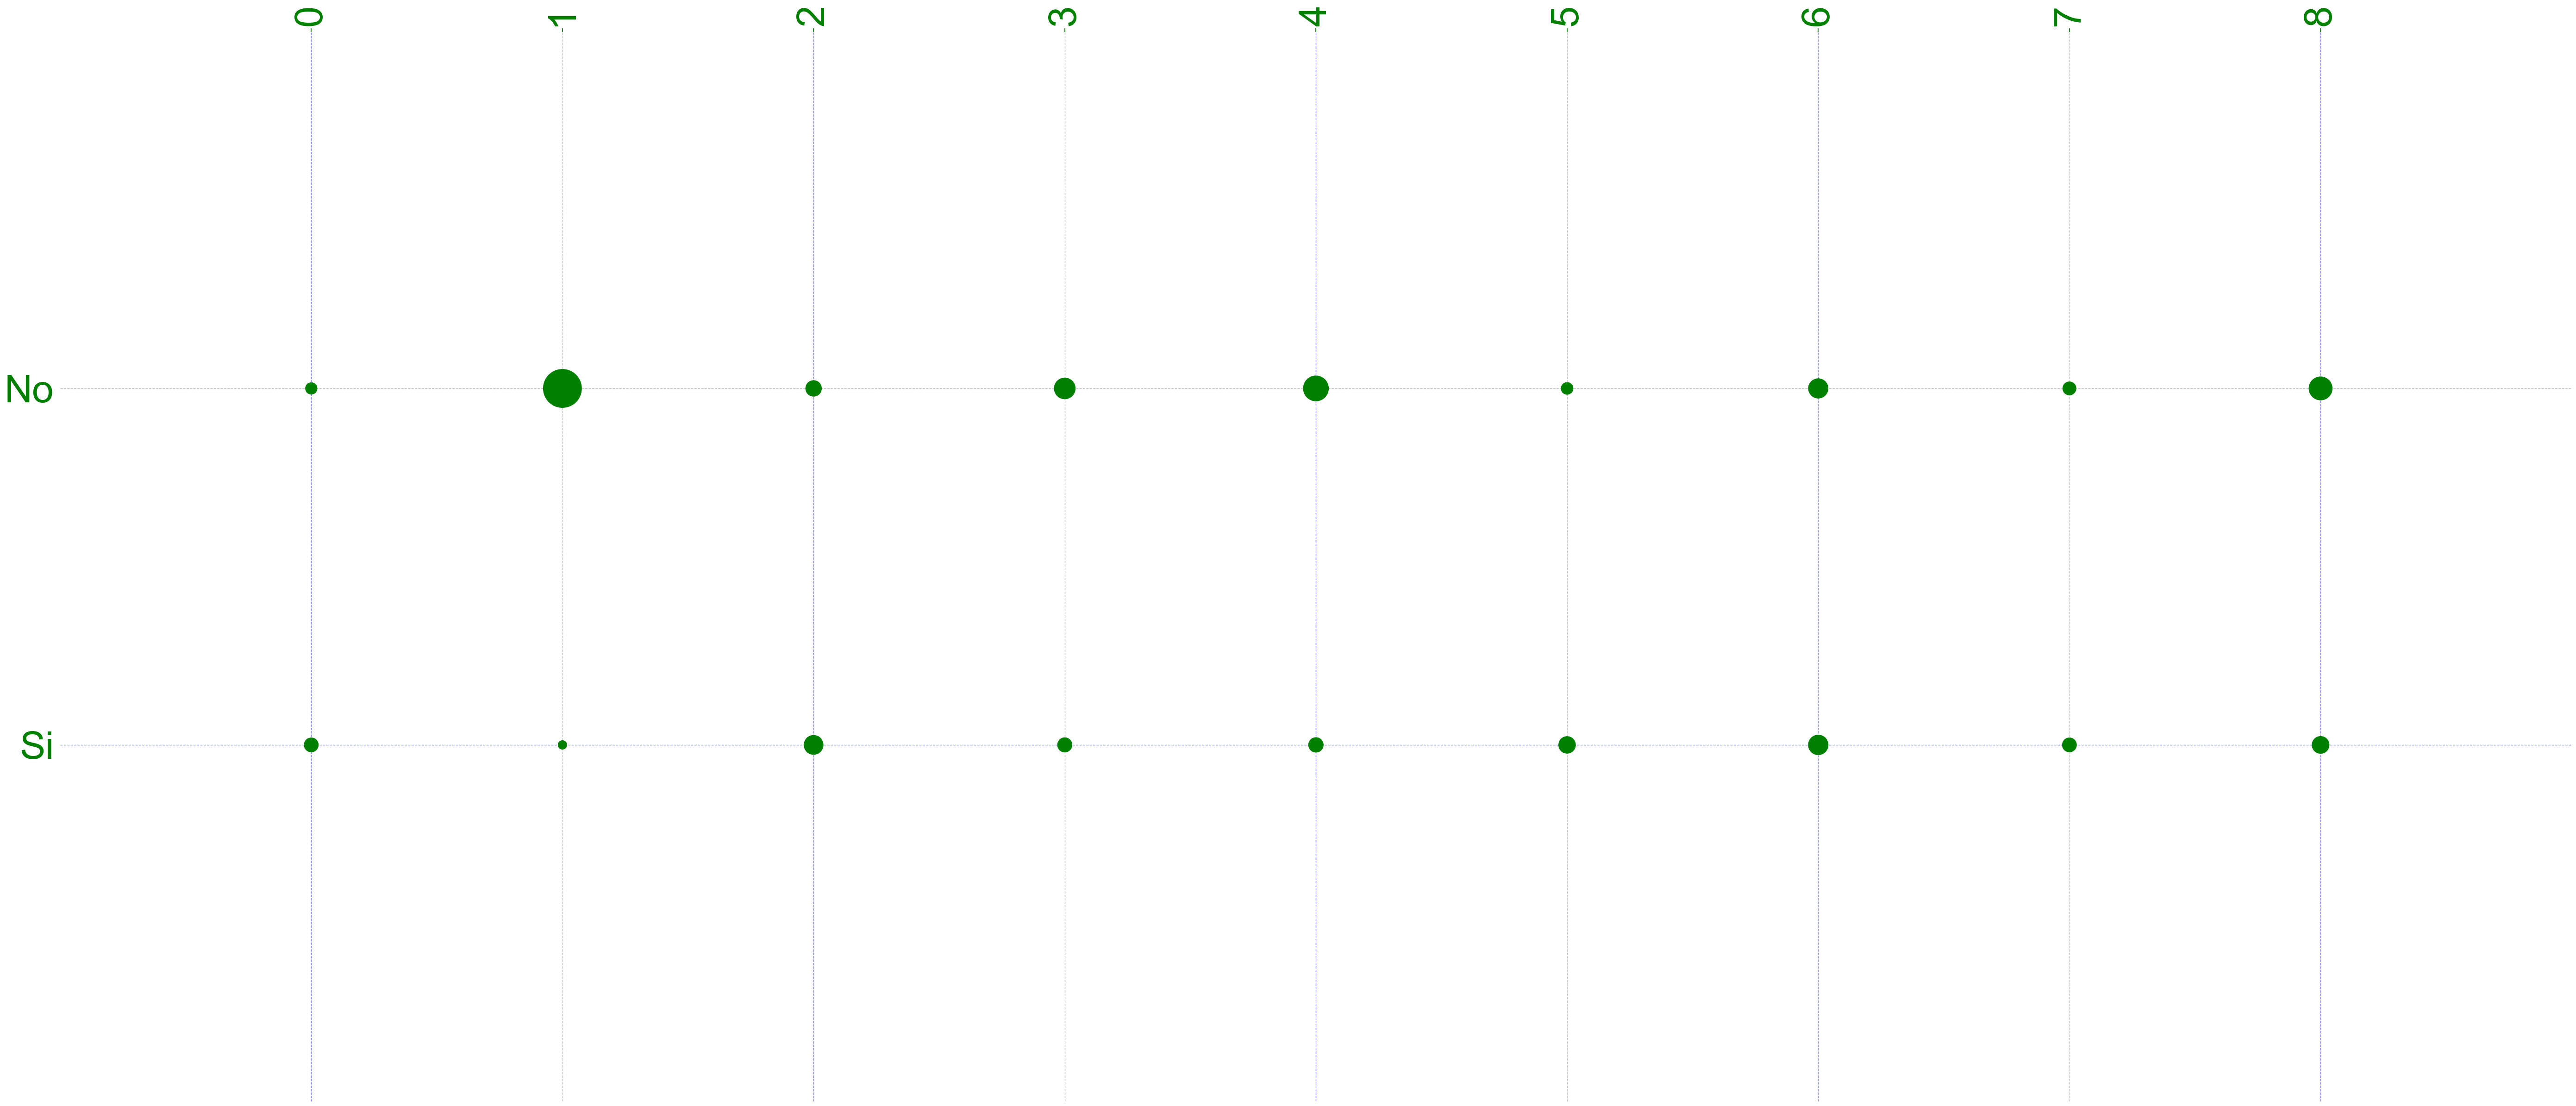

In [ ]:
# - https://github.com/myrthings/catscatter/blob/master/README.md
def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix.
            default 'Helvetica'
        - save: optional. True for saving as an image in the same path as the code.
            default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))
    
    # Save if wanted
    if save:
        plt.savefig(save_name+'.png')


# aggregate basis cat data for G7 membership of the country of the company headquarters and yaleGrade
agg_data = df.groupby(['Outcome','cluster']).size().reset_index(name='patient_count')

colors=['blue', 'grey', 'green']
# create the plot
plt.figure(figsize=(70,30))
catscatter(agg_data , 'cluster', 'Outcome', 'patient_count', font='Arial', color=colors, ratio=20)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()